In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\python\HR attrition.csv")

In [3]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
print("The Dataset has ",df.shape[0],"Rows and ",df.shape[1],"Columns")

The Dataset has  1470 Rows and  35 Columns


# Data informations and datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

found datatypes was correct

# checking missing values and duplicates

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
df.duplicated().sum()

0

we found that there is no missing values and no duplicates

# Descriptions

In [13]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# checking descrepencies

In [15]:
cat_df=df.select_dtypes(include='object')
num_df=df.select_dtypes(exclude='object')

In [16]:
cat_df

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [17]:
for i in cat_df.columns:
    print("\n")
    print(df[i].value_counts())



Attrition
No     1233
Yes     237
Name: count, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64


Gender
Male      882
Female    588
Name: count, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64


MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64


Over18
Y    1

# checking outliers

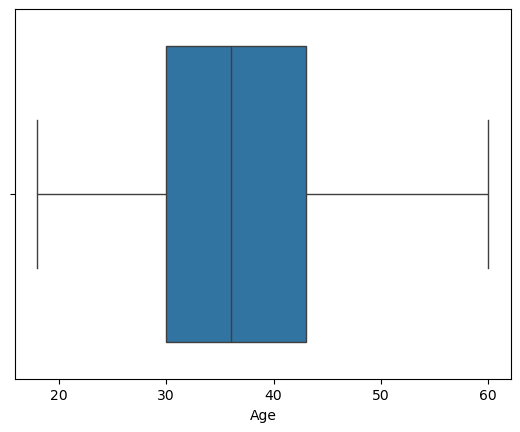

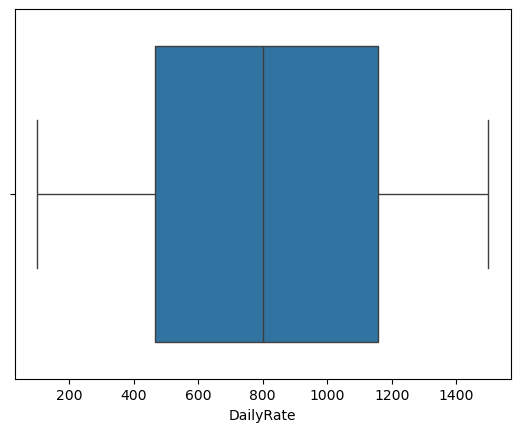

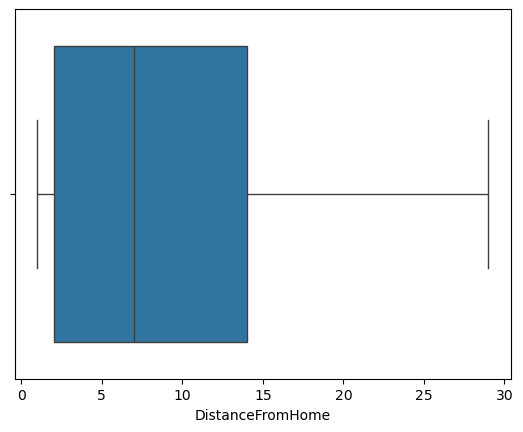

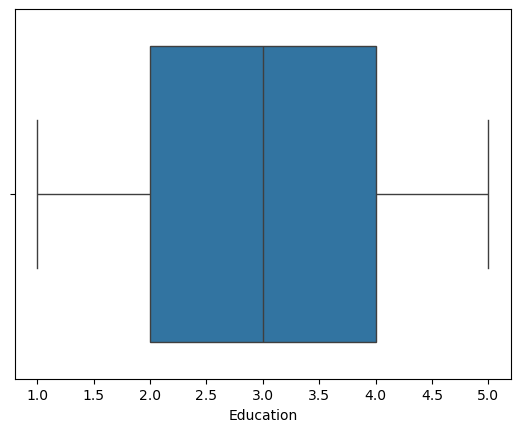

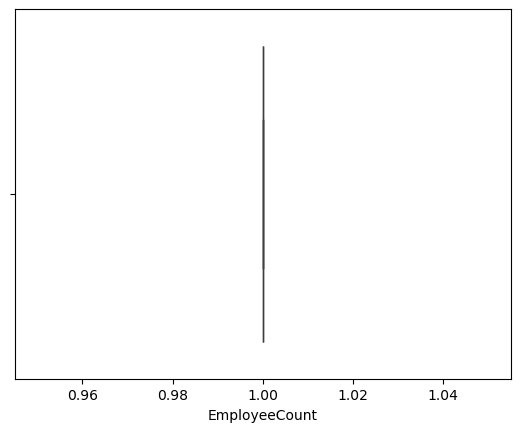

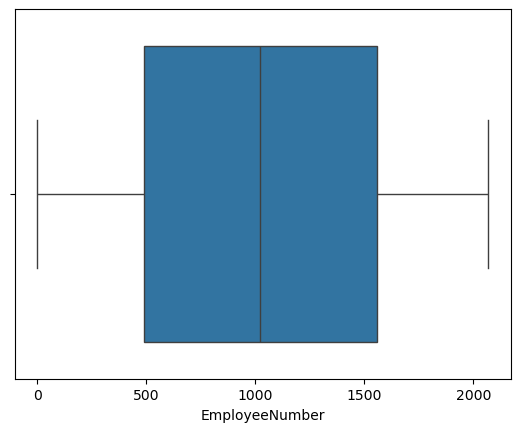

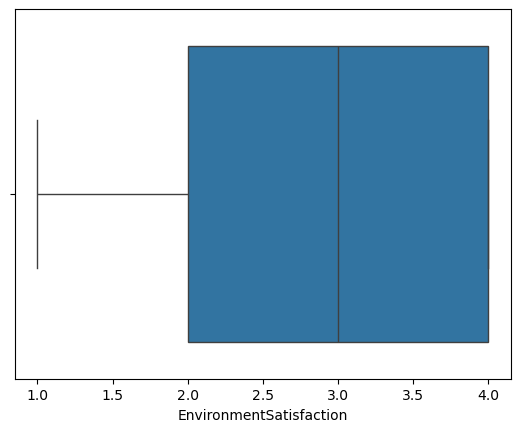

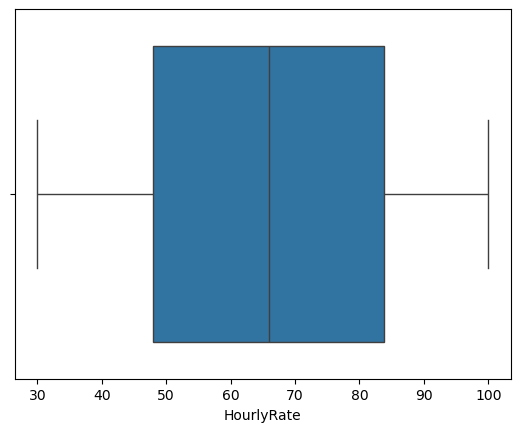

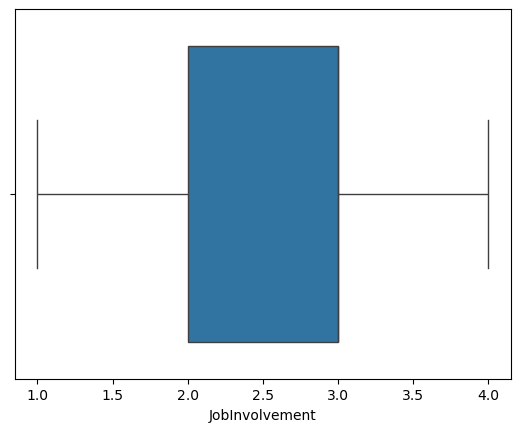

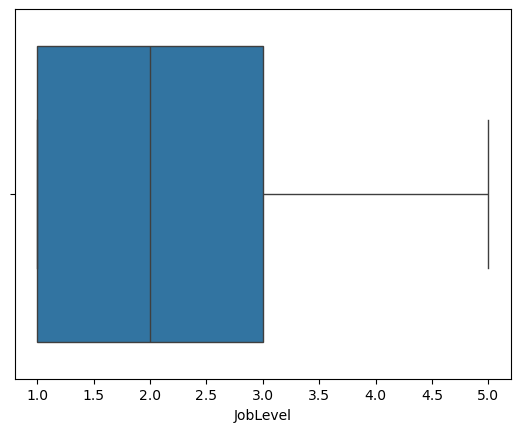

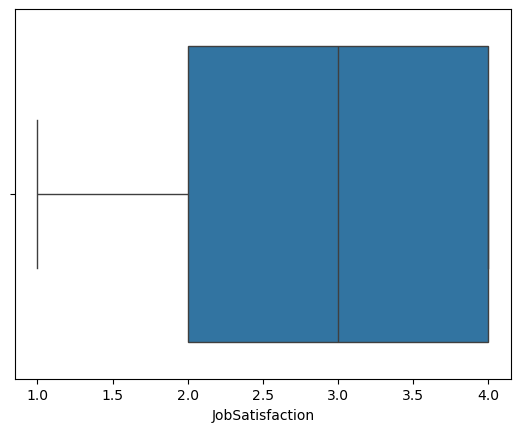

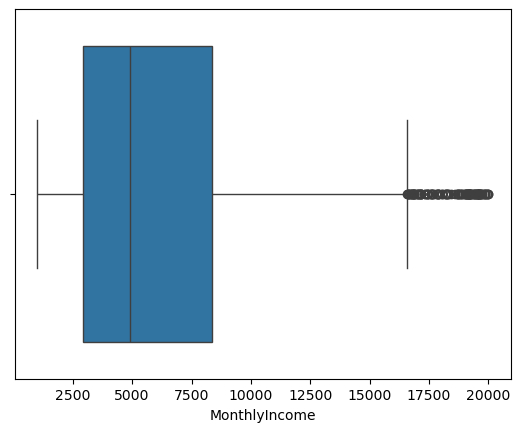

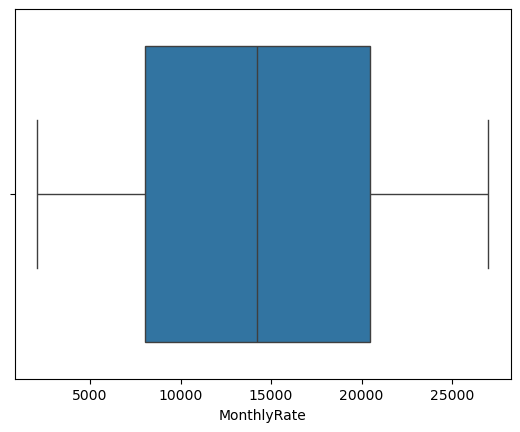

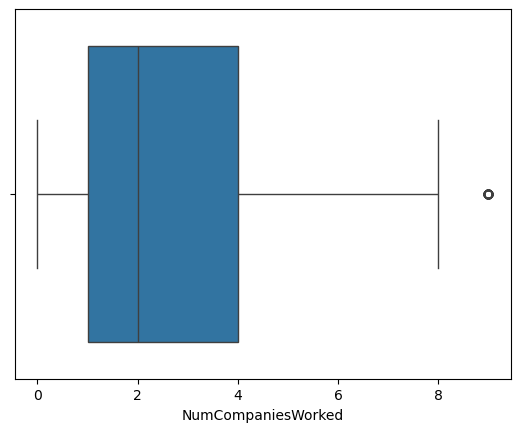

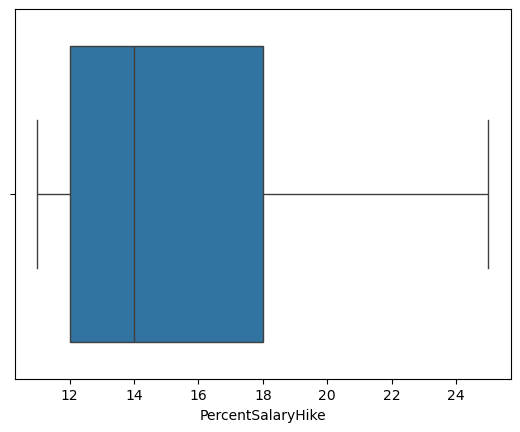

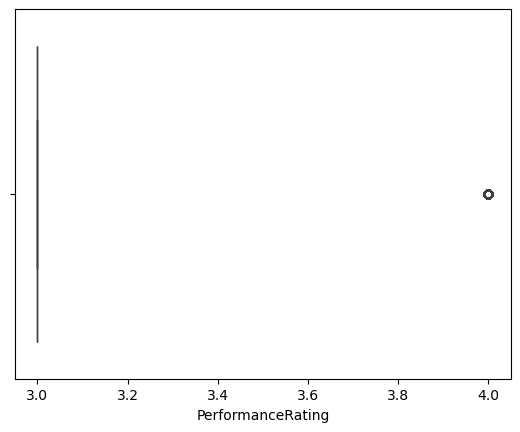

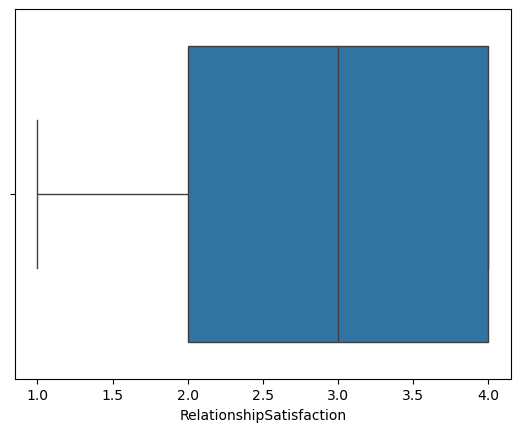

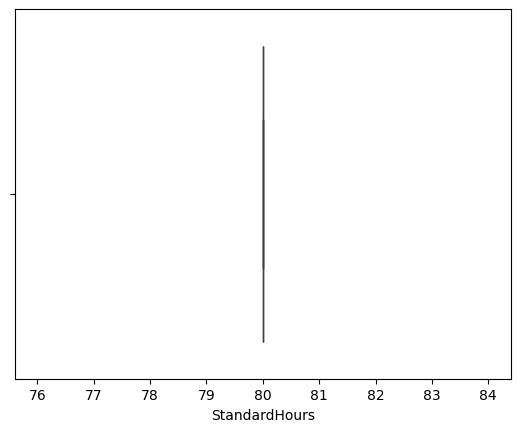

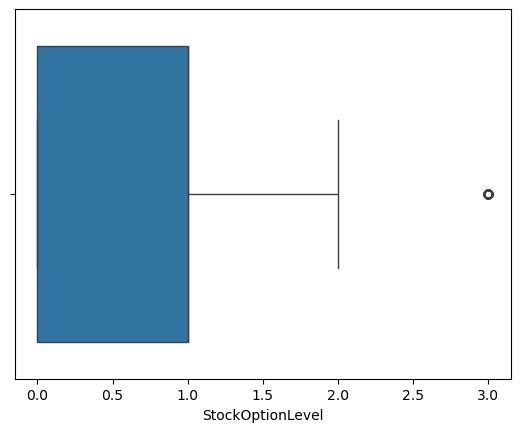

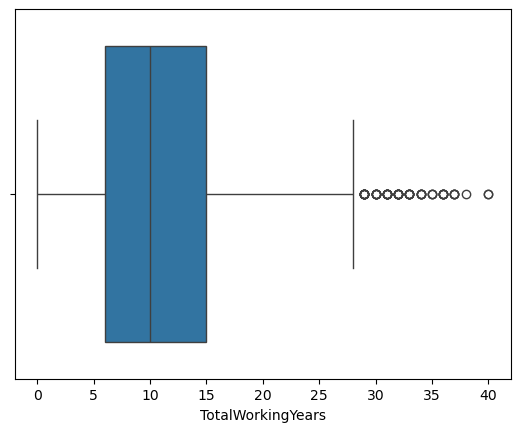

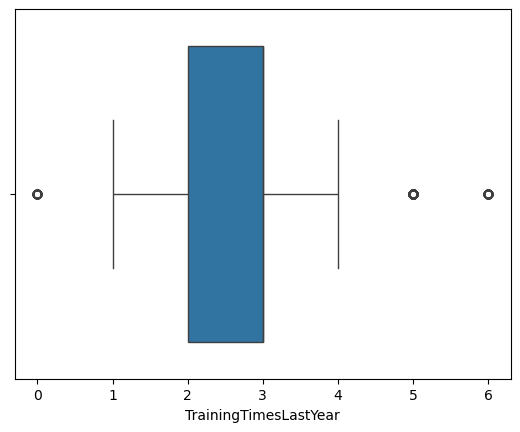

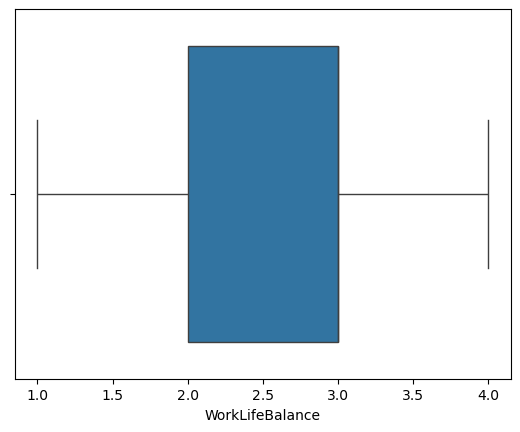

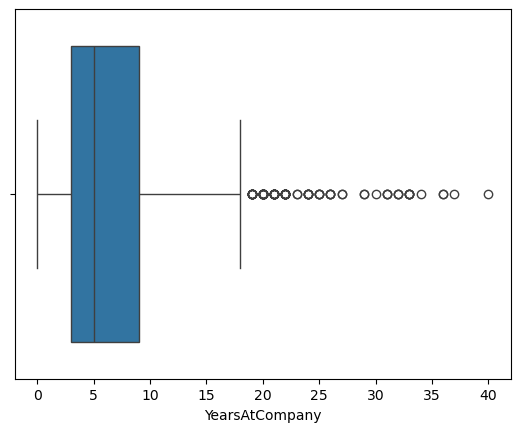

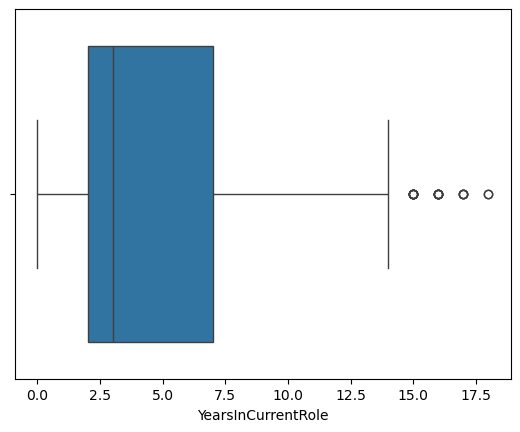

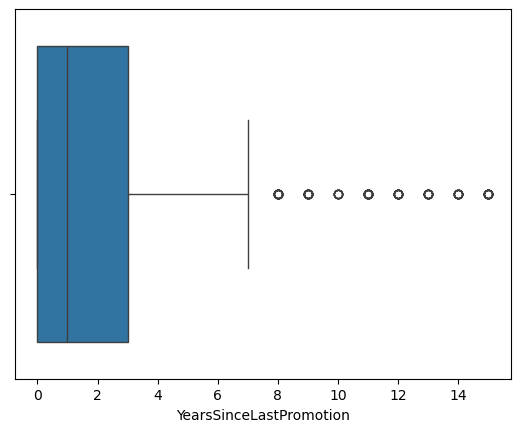

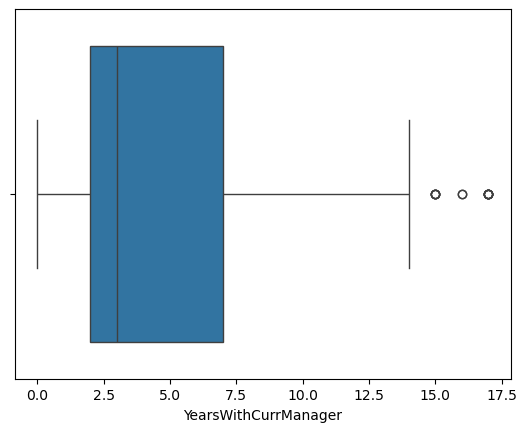

In [19]:
for i in num_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

few columns has outliers

# Outlier Treatment

In [22]:
for i in ['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lc=q1-1.5*iqr
    uc=q3+1.5*iqr
    df[i]=df[i].clip(lower=lc,upper=uc)

Outlier analysis

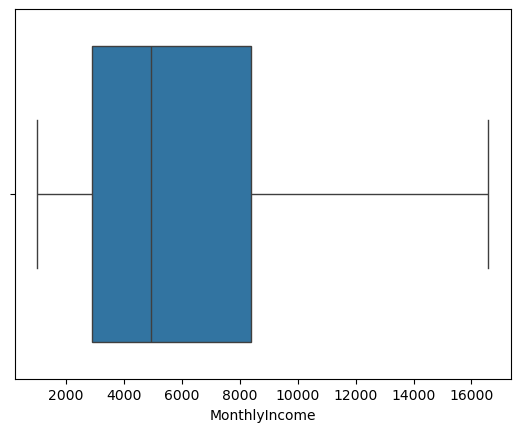

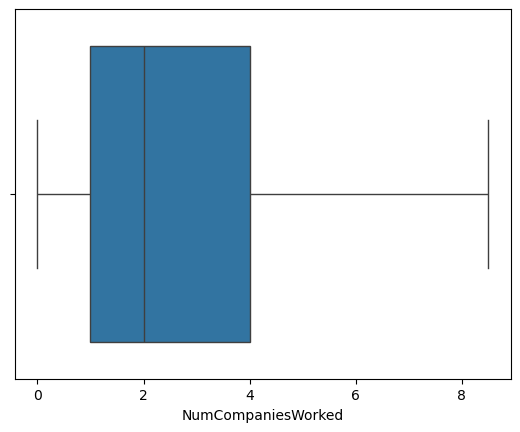

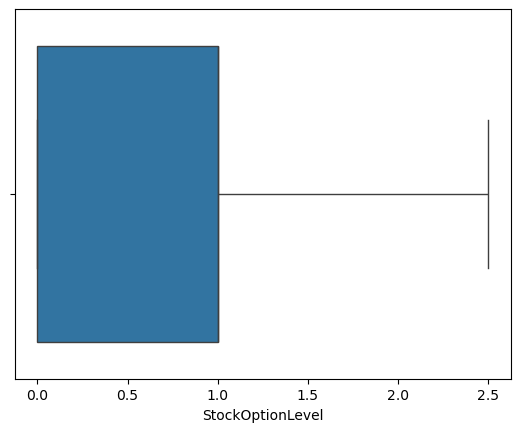

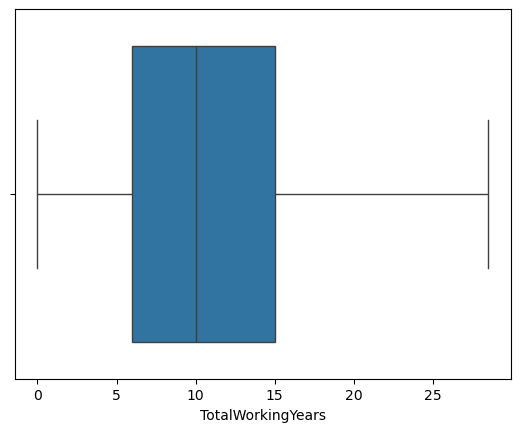

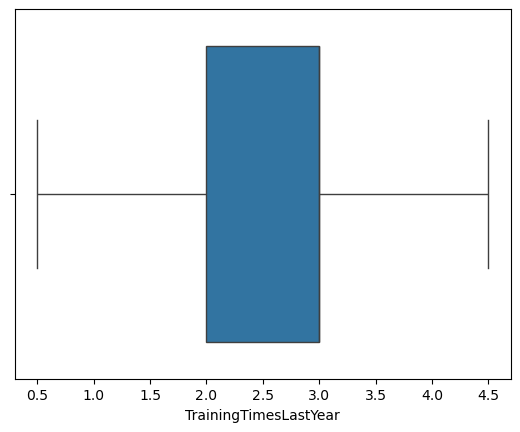

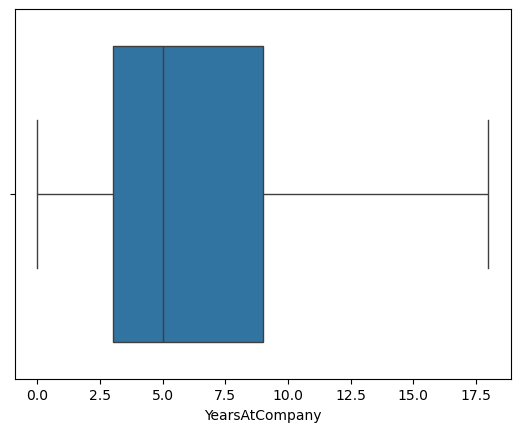

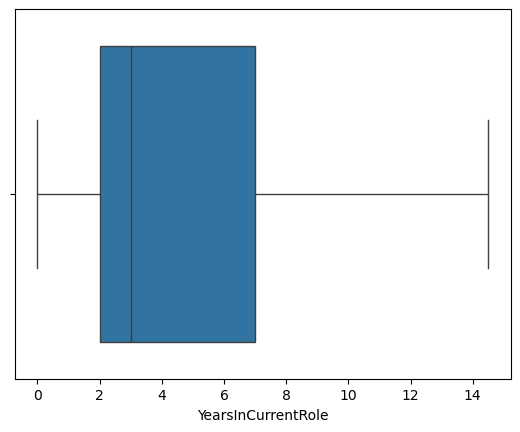

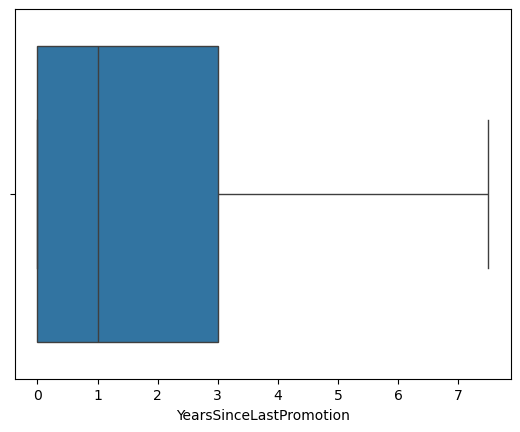

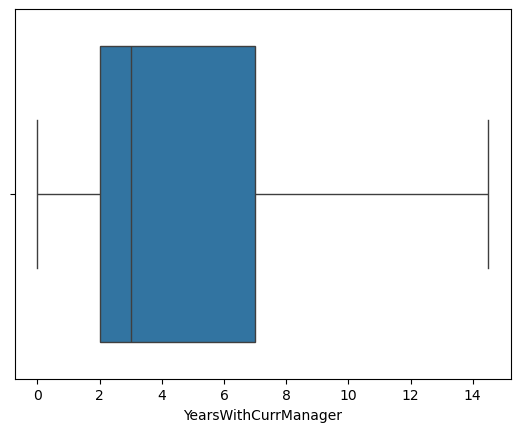

In [24]:
for i in ['MonthlyIncome','NumCompaniesWorked','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany',
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']:
    sns.boxplot(data=df,x=i)
    plt.show()

# Attrition Data

In [26]:
df1=df[df['Attrition']=='Yes'].reset_index()

In [27]:
df1=df1.drop(columns='index')
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.0,8.0,0.5,1,6,4.0,0.0,5.0
1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.0,7.0,3.0,3,0,0.0,0.0,0.0
2,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,1,19,...,2,80,0.0,6.0,4.0,3,4,2.0,0.0,3.0
3,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,...,2,80,0.0,10.0,4.0,3,5,3.0,0.0,3.0
4,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,1,31,...,3,80,0.0,8.0,2.0,3,4,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,80,1.0,1.0,3.0,2,1,0.0,1.0,0.0
233,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,80,2.5,4.0,3.0,4,2,2.0,2.0,2.0
234,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,80,1.0,14.0,4.0,1,10,9.0,7.5,8.0
235,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2.0,12.0,3.0,3,6,3.0,0.0,1.0


In [28]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
df2=df[df['Attrition']=='No'].reset_index()

In [30]:
df2=df2.drop(columns='index')
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.0,10.0,3.0,3,10,7.0,1.0,7.0
1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.0,8.0,3.0,3,8,7.0,3.0,0.0
2,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.0,6.0,3.0,3,2,2.0,2.0,2.0
3,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0.0,8.0,2.0,2,7,7.0,3.0,6.0
4,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,2.5,12.0,3.0,2,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1.0,17.0,3.0,3,5,2.0,0.0,3.0
1229,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1.0,9.0,4.5,3,7,7.0,1.0,7.0
1230,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1.0,6.0,0.5,3,6,2.0,0.0,3.0
1231,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0.0,17.0,3.0,2,9,6.0,0.0,8.0


 Attrition by department wise

In [32]:
d1=df1.groupby(by=['Department'])[['EmployeeCount']].sum().reset_index()
d1

,Department,EmployeeCount
0,Human Resources,12
1,Research & Development,133
2,Sales,92


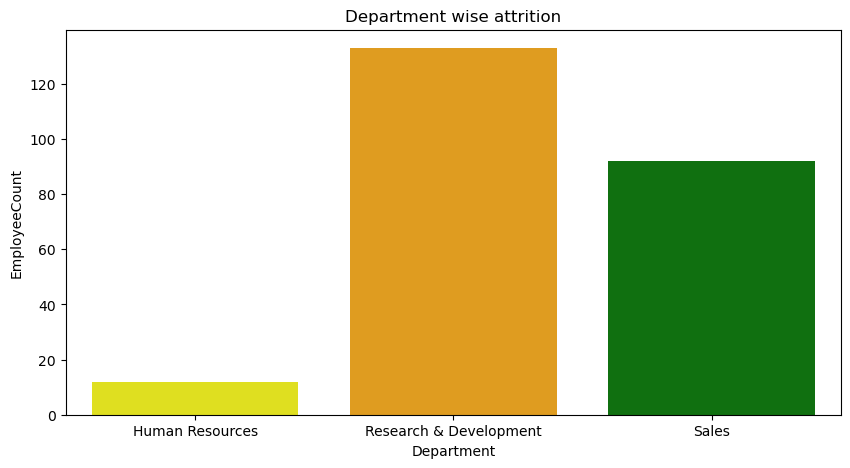

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=d1,y='EmployeeCount',x='Department',palette=['yellow','orange','green'])
plt.title("Department wise attrition")
plt.savefig("Department wise Attrition.jpg")
plt.show()

# Recommandations

1:Research and Development Department:
Employee Management:Implement recognition programs, team-building activities, and regular feedback sessions.

Career Development: Offer upskilling, mentorship, and clear growth paths to retain talent.

Workload Management: Ensure projects are evenly distributed; avoid burnout.

2. Sales Department

Incentives & Rewards: Introduce performance-based bonuses, contests, or recognition programs.

Work-Life Balance: Provide flexible schedules or remote options, especially during high-demand periods.

Support & Training: Provide tools and training to help employees meet targets efficiently.

3. Human Resources (Small Department)

Capacity Building: Consider hiring additional staff or using HR software to handle employee engagement and attrition tracking efficiently.

Data-Driven Decisions: Implement dashboards for tracking attrition trends, employee satisfaction, and department health.

# Attrition by genders

In [37]:
d2=df1.groupby(by=['Gender'])[['EmployeeCount']].sum().reset_index()
d2

,Gender,EmployeeCount
0,Female,87
1,Male,150


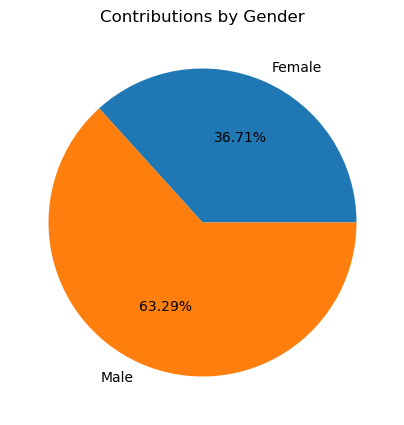

In [38]:
plt.figure(figsize=(5,5))
plt.pie(data=d2,x='EmployeeCount',labels=d2['Gender'],autopct='%1.2f%%')
plt.title("Contributions by Gender")
plt.savefig("Gender Contributions.png")
plt.show()

In [39]:
d10=df.groupby(by=['Attrition']).agg(total_employees=('EmployeeCount',np.sum),
                            job_satisfaction=('JobInvolvement',np.mean),
                            relationship=('RelationshipSatisfaction',np.mean),
                            life_balance=('WorkLifeBalance',np.mean),
                            envsatifies=('EnvironmentSatisfaction',np.mean),
                            job_satifies=('JobSatisfaction',np.mean)
)

d11=d10.reset_index()

In [40]:
d11

,Attrition,total_employees,job_satisfaction,relationship,life_balance,envsatifies,job_satifies
0,No,1233,2.770479,2.733982,2.781022,2.771290,2.778589
1,Yes,237,2.518987,2.599156,2.658228,2.464135,2.468354


# Recommendations

Improve Work Environment:

Ensure clean, safe, and comfortable workspaces.

Provide recreational areas or small perks to improve morale.

Enhance Managerial Relationships:

Train managers and team leaders in soft skills and people management.

make every month regular one-on-one feedback and recognition.

Optimize Workload & Work Hours:

Distribute tasks evenly; avoid overloading employees.

Consider flexible schedules to support better work–life balance.

Boost Employee Engagement:

Organize team events, celebrations, or small rewards.

Encourage career development programs and learning opportunities.

Monitor Key Satisfaction Metrics:

Regularly track environment satisfaction, job satisfaction, and work–life balance.

Address concerns proactively before employees decide to leave.